In [1]:
from IPython.display import HTML
from IPython.display import display, Image
import casadi as ca
from casadi import jacobian
from casadi import gradient
from casadi import Function
from casadi import vertcat

<h1 align="center" style="font-size: 35px;"><font color="C1772D"><strong>Aplicación del Control Óptimo en el Campo de la Robótica</strong></font></h1>

<h2 align="center"><font color="#667388"><strong>Luis F. Recalde</strong><br>Ambato-Ecuador</font></h2>


<h3 align="center"><font color="#667388"><strong>Universidad Indoamerica</strong></font></h3>

<h3 style="font-size: 30px; color: #C1772D; font-weight: bold; text-align: left;">Preliminares de Optimización</h3>


<h3 align="left" style="font-size: 20px; color: #667388;"><strong>Notación</strong></h3>


<div style="text-align: justify; font-size: 20px;"> En general, de los conceptos que se van a tratar existen diferentes notaciones, especialmente de dos áreas: "Machine Learning" y "Optimization and Control". Si no se definen de forma adecuada, pueden llegar a provocar problemas durante la codificación de los algoritmos. </div>



<div style="text-align: justify; font-size: 20px;"> Se presentará una notación que es fácil de entender y que funciona para todos los casos. Cabe mencionar que quizás no todos estén de acuerdo con esta nomenclatura.</div>


<div style="text-align: justify; font-size: 20px;"> Considerar la siguiente funcion:</div>


<span style="font-size:1.4em;">
\begin{equation}
   {f}(\mathbf{x}): \mathbb{R}^{n} \rightarrow \mathbb{R} 
\end{equation}
</span>

<div style="text-align: justify; font-size: 20px;"> De la cual se puede calcular su derivada parcial de la siguiente forma:</div>


<span style="font-size:1.4em;">
\begin{equation}
   \frac{\partial {f}}{\partial \mathbf{x}} \in \mathbb{R}^{1 \times n} 
\end{equation}
</span>

<div style="text-align: justify; font-size: 20px;">el cual siempre es un vector fila.</div>


<div style="text-align: justify; font-size: 20px;">Una de las razones por las cuales debe ser un vector fila y no un vector columna es que la regla de la cadena aún es aplicable. Esto se debe a que $\frac{\partial {f}}{\partial \mathbf{x}}$ es un operador lineal que mapea $\Delta{\mathbf{x}}$ en $\Delta f$. Esto puede expresarse utilizando la aproximación de Taylor, como se muestra a continuación:</div>


<span style="font-size:1.4em;">
\begin{equation}
   {f}(\mathbf{x} + \Delta \mathbf{x}) \approx  f(\mathbf{x}) +   \frac{\partial {f}}{\partial \mathbf{x}}\bigg|_{\mathbf{x}} \Delta \mathbf{x}
    \end{equation}
</span>

<div style="text-align: justify; font-size: 20px;">Demostrando que la única forma en la que la aproximación de Taylor tiene sentido es que $\frac{\partial {f}}{\partial \mathbf{x}}$ sea un vector fila.</div>


<div style="text-align: justify; font-size: 20px;"> De igual forma si se tiene la siguiente funcion vectorial:</div>


<span style="font-size:1.4em;">
\begin{equation}
   {g}(\mathbf{y}): \mathbb{R}^{m} \rightarrow \mathbb{R}^{n} 
\end{equation}
</span>

<div style="text-align: justify; font-size: 20px;"> De la cual se puede calcular su derivada parcial de la siguiente forma:</div>


<span style="font-size:1.4em;">
\begin{equation}
   \frac{\partial \mathbf{g}}{\partial \mathbf{y}} \in \mathbb{R}^{n \times m} 
\end{equation}
</span>

<div style="text-align: justify; font-size: 20px;">Esto puede expresarse utilizando la aproximación de Taylor, como se muestra a continuación:</div>


<span style="font-size:1.4em;">
\begin{equation}
   \mathbf{g}(\mathbf{y} + \Delta \mathbf{y}) \approx  \mathbf{g}(\mathbf{y}) +   \frac{\partial \mathbf{g}}{\partial \mathbf{y}}\bigg|_{\mathbf{y}} \Delta \mathbf{y}
    \end{equation}
</span>

<div style="text-align: justify; font-size: 20px;"> Estas definiciones hacen "Chain rule" funciones apropiadamente, esto se demuestra a continuacion:</div>

<span style="font-size:1.4em;">
\begin{equation}
   {f}(\mathbf{g}(\mathbf{y} + \Delta \mathbf{y})) \approx  f(\mathbf{g}(\mathbf{y})) +   \frac{\partial {f}}{\partial \mathbf{x}}\bigg|_{\mathbf{g}(\mathbf{y})} \frac{\partial \mathbf{g}}{\partial \mathbf{y}}\bigg|_{\mathbf{y}}  \Delta \mathbf{y}
    \end{equation}
</span>

<div style="text-align: justify; font-size: 20px;">Por otro lado, por conveniencia podemos definir el gradiente de la siguiente forma:</div>


<span style="font-size:1.4em;">
\begin{equation}
   \nabla f(\mathbf{x}) = (\frac{\partial {f}}{\partial \mathbf{x}})^{T} \in \mathbb{R}^{n \times 1} 
\end{equation}
</span>

<div style="text-align: justify; font-size: 20px;">Finalmente es posible definir el Hessiano de la siguiente forma:</div>


<span style="font-size:1.4em;">
\begin{equation}
   \nabla^{2} f(\mathbf{x}) = \frac{\partial}{\mathbf{x}} \nabla f(\mathbf{x}) = \frac{\partial^2 {f}}{\partial^2 \mathbf{x}}\in \mathbb{R}^{n \times n}
\end{equation}
</span>

<h3 align="left" style="font-size: 20px; color: #667388;"><strong>Root-Finding</strong></h3>


<div style="text-align: justify; font-size: 20px;">Este algoritmo se encarga de encontrar las raíces de un vector funcional. Esto puede expresarse de la siguiente forma:</div>


<span style="font-size:1.4em;">
\begin{equation}
   \text{Dada la siguiente funcion}~~~~~~f({\mathbf{x}})~~~~~~\text{encontrar}~~~~~~~~\mathbf{x}^{*}~~~~~~~\text{tal que}~~~~~~f({\mathbf{x}^{*}}) = \mathbf{0}
\end{equation}
</span>

<div class="alert alert-block alert-warning" style="font-size: 16px;">  
  <b>Nota:</b> Un ejemplo práctico son los puntos de equilibrio de un sistema dinámico $\mathbf{f}(\mathbf{x}, \mathbf{u}) = \mathbf{0}$.
</div>


<div style="text-align: justify; font-size: 20px;">Dicho concepto se encuentra relacionado con el "Fixed point", el cual puede ser escrito como:</div>


<span style="font-size:1.4em;">
\begin{equation}
   f({\mathbf{x}^{*}}) = \mathbf{x}^{*}
\end{equation}
</span>

<div class="alert alert-block alert-warning" style="font-size: 16px;">  
  <b>Nota:</b> Un ejemplo práctico son los puntos de equilibrio de un sistema dinámico en tiempo discreto.
</div>


<div style="text-align: justify; font-size: 20px;">Como podemos resolver estos problemas ?</div>


<h3 align="left" style="font-size: 20px;"><font color="#2D5AC1"><strong>Fixed Point Iteration</strong></font></h3>


<div style="text-align: justify; font-size: 20px;">Esta es una de las formas más simples de encontrar las raíces o "roots". Si consideramos un sistema dinámico y sabemos que hay un punto de equilibrio en algún lado, y conocemos que la dinámica es estable, podemos simular las dinámicas y encontrar dicho punto solo con iteraciones. Este concepto se puede extrapolar a la optimización.</div>


<div class="alert alert-block alert-warning" style="font-size: 16px;">  
  <b>Nota:</b> Sin embargo, solo funciona para puntos estables.
</div>


<div class="alert alert-block alert-warning" style="font-size: 16px;">
  <b>Nota:</b> Se considera que es exactamente "Gradient Descent" con las dinámicas en tiempo discreto.
</div>


<div class="alert alert-block alert-warning" style="font-size: 16px;">
  <b>Nota:</b> No existe una buena convergencia del algoritmo.
</div>


<h3 align="left" style="font-size: 20px;"><font color="#2D5AC1"><strong>Newton's Method</strong></font></h3>


<div style="text-align: justify; font-size: 20px;">
  La idea principal de este método es que se toma la función $\mathbf{f}(\mathbf{x})$ y se le aplica una aproximación lineal, luego se resuelve el sistema lineal. Esto puede ser escrito a continuación como:
</div>


<span style="font-size:1.4em;">
\begin{equation}
   \mathbf{f}(\mathbf{x} + \Delta \mathbf{x}) \approx  \mathbf{f}(\mathbf{x}) +   \frac{\partial \mathbf{f}}{\partial \mathbf{x}}\bigg|_{\mathbf{x}} \Delta \mathbf{x}
    \end{equation}
</span>

<span style="font-size:1.4em;">
\begin{equation}
     \mathbf{f}(\mathbf{x}) +   \frac{\partial \mathbf{f}}{\partial \mathbf{x}}\bigg|_{\mathbf{x}} \Delta \mathbf{x} = \mathbf{0}
    \end{equation}
</span>

<span style="font-size:1.4em;">
\begin{equation}
       \Delta \mathbf{x} = -  \frac{\partial \mathbf{f}}{\partial \mathbf{x}}^{-1}\bigg|_{\mathbf{x}} \mathbf{f}(\mathbf{x}) 
    \end{equation}
</span>

<div style="text-align: justify; font-size: 20px;">
  Aplicar la corrección a $\mathbf{x}$, resultando en:
</div>


<span style="font-size:1.4em;">
\begin{equation}
    \mathbf{x}_{n} =  \mathbf{x}_{n} -  \frac{\partial \mathbf{f}}{\partial \mathbf{x}}^{-1}\bigg|_{\mathbf{x}_n} \mathbf{f}(\mathbf{x}_n) 
    \end{equation}
</span>

<div class="alert alert-block alert-warning" style="font-size: 16px;">
  <b>Nota:</b> Si $\frac{\partial \mathbf{f}}{\partial \mathbf{x}}$ no es una matriz cuadrada, se tienen dos posibilidades: el problema de mínimos cuadrados, que es muy común al identificar dinámicas, o el otro caso es la mínima norma, donde se tiene un subespacio de soluciones.
</div>


<div class="alert alert-block alert-warning" style="font-size: 16px;">
  <b>Nota:</b> Si $\frac{\partial \mathbf{f}}{\partial \mathbf{x}}$ no es una matriz cuadrada, se tienen dos posibilidades: el problema de mínimos cuadrados, que es muy común al identificar dinámicas, o el otro caso es la mínima norma, donde se tiene un subespacio de soluciones.
</div>


<h3 align="left" style="font-size: 20px; color: #667388;"><strong>Fixed Point Iteration y Newton's Method</strong></h3>


<div class="alert alert-block alert-success" style="font-size: 16px;">  
  <b>Code:</b>
</div>

In [2]:
from IPython.display import HTML
from IPython.display import display, Image
import casadi as ca
from casadi import jacobian
from casadi import gradient
from casadi import Function
from casadi import vertcat
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt


### Funciones

In [3]:
def dynamics(x: np.ndarray, u: np.ndarray)-> np.ndarray:
    # Function representing the system dynamics.
    # INPUT
    # x                                          - states of the system
    # u                                          - control actions of the system
    # OUTPUT
    # x_dot                                      - Vector field or flow.
  
    # System variables 
    l = 1.0
    g = 9.81
    m = 1

    # Split states of the system
    
    theta = x[0]
    theta_dot = x[1]
    u = u[0]
    
    
    # Dynamics of the system
    theta_ddot = -(g/l)*np.sin(theta) + (1/(m*(l**2)))*u

    # Get Vector Field
    x_dot = np.array([[theta_dot], [theta_ddot]])
    x_dot = x_dot.reshape((2, ))
    return x_dot
        

### Fixed point Alorithm

In [4]:
def backward_euler_fixed_point(x0, u, ts):
    # Function of the fized point algorithm
    # INPUTS
    # fun                                  - system dynamics
    # x0                                   - Initial State
    # ts                                   - ts sample time
    # xn                                   - solution
    # e                                    - error over algorithm

    xn = x0
    aux_e = x0 + ts*dynamics(xn, u) - xn
    aux_e_n = LA.norm(aux_e)
    
    e = []
    e.append(aux_e_n)
    while True:
        xn = x0 + ts*dynamics(xn, u)
        aux_e = x0 + ts*dynamics(xn, u) - xn
        aux_e_n = LA.norm(aux_e)
        e.append(aux_e_n)
        if aux_e_n < 1e-8:
            break
        else:
            continue
    e = np.array(e)
    return xn, e

In [5]:
def plot_results(x, u, t):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

    # Plot x_estimate with label 'x_estimate'
    ax1.set_xticklabels([])
    ax2.set_xticklabels([])
    state_1, = ax1.plot(t, x[0, 0:t.shape[0]], color='#C04747', lw=1.5, ls="-")
    state_2, = ax2.plot(t, x[1, 0:t.shape[0]], color='#47C05B', lw=1.5, ls="-")
    state_3, = ax3.plot(t, u[0, 0:t.shape[0]], color='#478DC0', lw=1.5, ls="-")
    # Add a legend
    ax1.legend([state_1],
                [r'theta'],
                loc="best",
                frameon=True, fancybox=True, shadow=False, ncol=2,
                borderpad=0.5, labelspacing=0.5, handlelength=3, handletextpad=0.1,
                borderaxespad=0.3, columnspacing=2)
             
    ax2.legend([state_2],
                [r'theta dot'],
                loc="best",
                frameon=True, fancybox=True, shadow=False, ncol=2,
                borderpad=0.5, labelspacing=0.5, handlelength=3, handletextpad=0.1,
                borderaxespad=0.3, columnspacing=2)
    
    ax3.legend([state_3],
                [r'u'],
                loc="best",
                frameon=True, fancybox=True, shadow=False, ncol=2,
                borderpad=0.5, labelspacing=0.5, handlelength=3, handletextpad=0.1,
                borderaxespad=0.3, columnspacing=2)
    
    ax1.grid(color='#949494', linestyle='-.', linewidth=0.8)
    ax2.grid(color='#949494', linestyle='-.', linewidth=0.8)
    ax3.grid(color='#949494', linestyle='-.', linewidth=0.8)
    
    ax3.set_xlabel(r"$Time}[s]$", labelpad=5)
    # Show the plot
    plt.show()

In [6]:
def simulation(ts: float, tf: float, x0: np.ndarray, f):
    # Function which computes the simulation of the pendulum.
    # INPUT
    # x0                                          - initial state of the system
    # ts                                          - sample time
    # tf                                          - final time simulation
    # OUTPUT
    # x                                          - vector of the states of the system
    # u                                          - vector of the control actions of the system
    # t                                          - vector of the simulation time

    # Vector of the time
    t = np.arange(0, tf + ts, ts, dtype=np.double)
    
    # System States
    x = np.zeros((2, t.shape[0]+1), dtype = np.double)
    x[:, 0] = x0
    
    # System control actions
    u = np.zeros((1, t.shape[0]), dtype = np.double)
    
    # Simulation 
    for k in range(0, t.shape[0]):
        x[:, k+1], _ = f(x[:, k],  u[:, k], ts)
    return x, u, t

### Resultados

In [7]:
# Time definition
ts = 0.01
tf = 10
# System States
x0 = np.array([0.1, 0])
# Simulation of the system
x, u, t = simulation(ts, tf, x0, backward_euler_fixed_point)

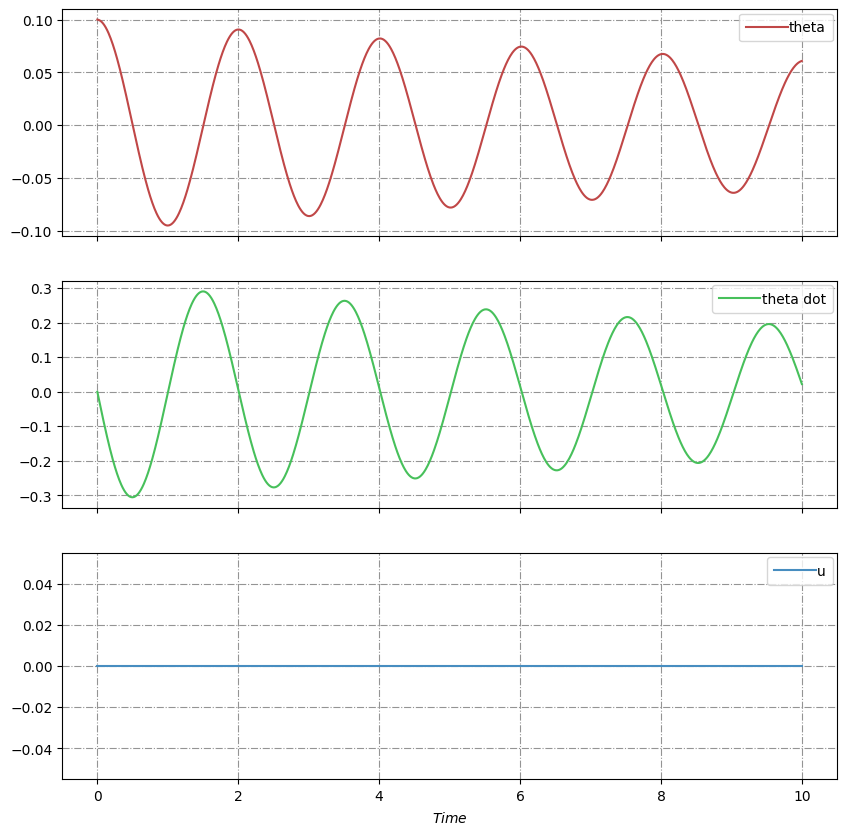

In [8]:
plot_results(x, u, t)

### Verificar la funcion

In [9]:
# Time definition
ts = 0.01
tf = 10
# System States
x0 = np.array([0.1, 0])
u = np.array([0])
x1, e = backward_euler_fixed_point(x0, u, ts)

### Newton Method Algorithm

In [10]:
def dynamics_casadi():
    # Function representing the system dynamics using casadi
    # INPUT
    # None
    # OUTPUT
    # casadi_kutta                                       - Function to compute 4 order runge kutta.
    # df_fx                                              - partial derivative
    # df_du                                              - partial derivative
    # System symboly variables
    x = ca.MX.sym('x', 2, 1)
    xk = ca.MX.sym('xk', 2, 1)
    u = ca.MX.sym('u', 1, 1)
    ts = ca.MX.sym('ts', 1, 1)
    # System variables 
    l = 1.0
    g = 9.81
    m = 1

    # Dynamics of the system
    theta_ddot = -(g/l)*ca.sin(xk[0, 0]) + (1/(m*(l**2)))*u[0, 0]

    # Get Vector Field
    x_dot = ca.MX.zeros(2, 1)
    x_dot[0, 0] = xk[1, 0]
    x_dot[1, 0] = theta_ddot
    dynamics_casadi_f = Function('dynamics_casadi_f',[xk, u], [x_dot])

    ## Integration method
    k1 = dynamics_casadi_f(xk, u)

    implicit = x + ts*k1 - xk
    casadi_kutta = Function('casadi_kutta',[x, u, xk, ts], [implicit])

    ## Calculate jacobian and gradient
    dfdx_f = jacobian(implicit, xk) 
    dfdu_f = jacobian(implicit, u)

    df_dx = Function('df_dx', [x, u, xk, ts], [dfdx_f])
    df_du = Function('df_du', [x, u, xk, ts], [dfdu_f])
    
    return casadi_kutta, df_dx, df_du

In [11]:
def newton_method(x0, u, ts, f, dfdx):
    # Function of the Newton Method algorithm
    xn = x0
    r = f(x0, u, xn, ts)
    e = []
    e.append(LA.norm(r))
    aux_n  = LA.norm(r)
    while True:
        dr = dfdx(x0, u, xn, ts)
        xn = xn - LA.inv(dr)@r
        r = f(x0, u, xn, ts)
        e.append(LA.norm(r))
        aux_n  = LA.norm(r)
        if aux_n < 1e-8:
            break
        else:
            continue
    e = np.array(e)
    return xn, e

In [12]:
def simulation_newton(ts: float, tf: float, x0: np.ndarray, f, dfdx):
    # Function which computes the simulation of the pendulum.
    # INPUT
    # x0                                          - initial state of the system
    # ts                                          - sample time
    # tf                                          - final time simulation
    # OUTPUT
    # x                                          - vector of the states of the system
    # u                                          - vector of the control actions of the system
    # t                                          - vector of the simulation time

    # Vector of the time
    t = np.arange(0, tf + ts, ts, dtype=np.double)
    
    # System States
    x = np.zeros((2, t.shape[0]+1), dtype = np.double)
    x[:, 0] = x0
    
    # System control actions
    u = np.zeros((1, t.shape[0]), dtype = np.double)
    
    # Simulation 
    for k in range(0, t.shape[0]):
        aux_states, _ = newton_method(x[:, k], u[:, k], ts, f, dfdx)
        x[:, k+1] = np.array(aux_states[:, 0]).reshape((2, ))
    return x, u, t

In [13]:
# Time definition
ts = 0.01
tf = 10
# System States
x0 = np.array([0.1, 0])
u = np.array([0])
# Casadi Functions
f , fdx, fdu = dynamics_casadi()
# Simulation of the system
x, u, t = simulation_newton(ts, tf, x0, f, fdx)

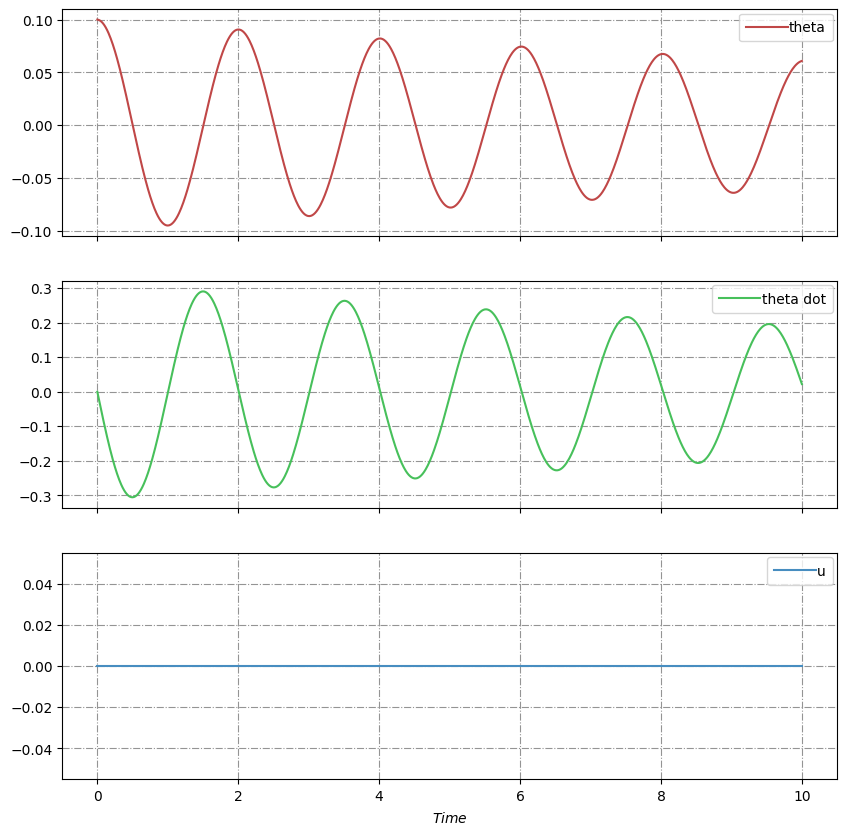

In [14]:
plot_results(x, u, t)

In [24]:
def plot_results_methods(e1, e2):
    fig, (ax1) = plt.subplots(1, 1, figsize=(15, 7))

    # Plot x_estimate with label 'x_estimate'
    state_1, = ax1.semilogy(e1[:], color='#C04747', lw=1.5, ls="-")
    state_2, = ax1.semilogy(e2[:], color='#47C05B', lw=1.5, ls="-")
    # Add a legend
    ax1.legend([state_1, state_2],
                [r'e1', r'e2'],
                loc="best",
                frameon=True, fancybox=True, shadow=False, ncol=2,
                borderpad=0.5, labelspacing=0.5, handlelength=3, handletextpad=0.1,
                borderaxespad=0.3, columnspacing=2)
             


    ax1.grid(color='#949494', linestyle='-.', linewidth=0.8)

    
    ax1.set_xlabel(r"$Iterations}[s]$", labelpad=5)
    # Show the plot
    plt.show()

### Comparar las dos formulaciones

In [25]:
# Time definition
ts = 0.1
tf = 10
# System States
x0 = np.array([0.1, 0])
u = np.array([0])

### Iniciamos con Fixed Point

In [26]:
x1, e1 = backward_euler_fixed_point(x0, u, ts)
print(x1)
print(e1)

[ 0.09107764 -0.08922369]
[9.79365817e-02 9.79365817e-03 9.56412477e-03 9.56412477e-04
 9.34385348e-04 9.34385348e-05 9.12829658e-05 9.12829658e-06
 8.91774679e-06 8.91774679e-07 8.71205018e-07 8.71205018e-08
 8.51109847e-08 8.51109848e-09]


### Newton Method

In [27]:
x2, e2 = newton_method(x0, u, ts, f, fdx)
print(x2)
print(e2)

[0.0910776, -0.0892237]
[9.79365817e-02 3.78300872e-06 5.28745537e-15]


### Graficando los errores de convergencia

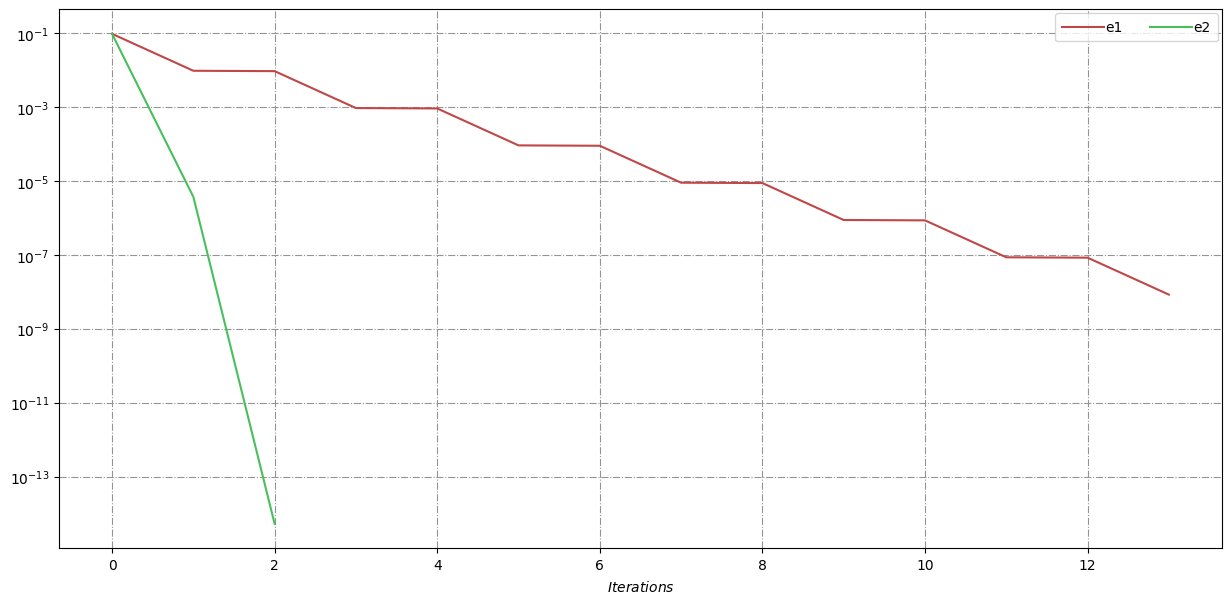

In [28]:
plot_results_methods(e1, e2)

<div class="alert alert-block alert-warning" style="font-size: 16px;">
  <b>Nota:</b> El comportamiento del método "Fixed Point" es prácticamente lineal, pero por otro lado, el método de Newton es cuadrático.
</div>


<div class="alert alert-block alert-success" style="font-size: 16px;">
  <b>Notas:</b> El método de Newton presenta convergencia cuadrática.
</div>


<div class="alert alert-block alert-success" style="font-size: 16px;">
  <b>Notas:</b> Se pueden obtener altas precisiones en la resolución.
</div>


<div class="alert alert-block alert-success" style="font-size: 16px;">
  <b>Notas:</b> Sin embargo, obtener la inversa de una matriz es la sección que requiere más tiempo resolver, lo cual llega a expresarse como un orden de $O(n^3)$.
</div>



<div class="alert alert-block alert-success" style="font-size: 16px;">
  <b>Notas:</b> Se puede utilizar la estructura de ciertos problemas y reducir el nivel de complejidad. (En futuras secciones se retomará este tema).
</div>


<h3 style="font-size: 30px; color: #C1772D; font-weight: bold; text-align: left;">Optimización Minimización</h3>
